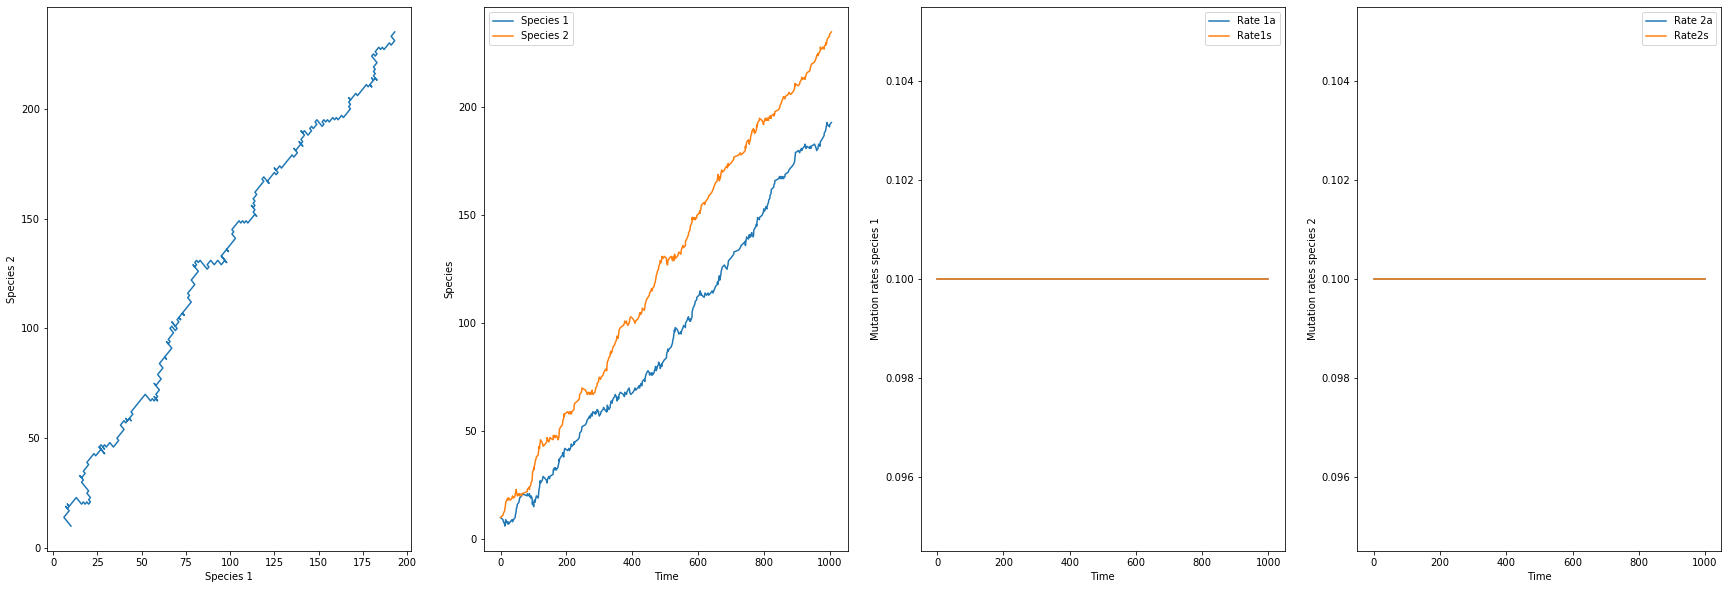

In [11]:
# BGGN 212

import math
import random
import matplotlib.pyplot as plt
import numpy as np

# Input parameters ####################

# int; total population
X = 10
Y = 10

# float; maximum elapsed time
T = 1000.0 

# float; start time
t = 0.0



# CONSTANTS
_alpha1 = 0.1
_beta1 = 0.1
_alpha2 = 0.1
_beta2 = 0.1

#########################################

# Numpy array
data = np.zeros((100000,3))
mutrate1a = np.zeros((100000,1))
mutrate1s = np.zeros((100000,1))
mutrate2a= np.zeros((100000,1))
mutrate2s= np.zeros((100000,1))

data[0,:]=[t, X, Y]

count1=1;
# count2=0;

# Main loop
while t < T and ((count1)<100000):
    if X == 0 | Y==0:
        break

    # Rate constants for beneficial mutation occuring in species 1
    w1=_alpha1
    w2=_beta1
    w3=_alpha2
    w4=_beta2
    
#     w1 =10000-( X)*_alpha1
#     w2 =10000-(X)*_beta1 
#     w3 =10000-(Y)*_alpha2  
#     w4 =10000-( Y)*_beta2
    
    
    if w1 <0:
        w1=0
    if w2<0:
        w2=0
    if w3 <0:
        w3=0
    if w4<0:
        w4=0
        
    mutrate1a[count1-1]=w1
    mutrate1s[count1-1]=w2
    mutrate2a[count1-1]=w3
    mutrate2s[count1-1]=w4
                

            
    W = w1 + w2+ w3+ w4
    
    # time point at which evolution happens
    dt = -math.log(random.uniform(0.0, 1.0))/W
    t = t + dt

    # make adjustment of comapring which is small and use in place of w2
    rand=random.uniform(0.0, 1.0)
    if rand < w1 / W:
        #A1 deleterious mutation in Y
        X = X + 1
        Y = Y - 1
    elif rand < (w1+w2) / W:
        #S1 beneficial mutation in Y
        X = X + 1
        Y = Y + 1
    elif rand<(w1+w2+w3)/W:
        #A2 
        X = X - 1
        Y = Y + 1
    else:
        #S2
        X = X + 1
        Y = Y + 1
    
   
    data[count1,:]=[t, X, Y]
    count1+=1


 
    
                
data=data[0:count1,:]
mutrate2a=mutrate2a[0:count1-1]
mutrate2s=mutrate2s[0:count1-1]
mutrate1a=mutrate1a[0:count1-1]
mutrate1s=mutrate1s[0:count1-1]

# print(data)    
fig,ax=plt.subplots(1,4, figsize = (30, 10))
ax[0].plot(data[:,1],data[:,2])
ax[0].set_xlabel('Species 1')
ax[0].set_ylabel('Species 2')


figure1=ax[1].plot(data[:,0],data[:,1],data[:,0],data[:,2])
ax[1].legend(figure1, ('Species 1','Species 2'))
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Species')
# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)

# plt.legend('Species 1','Species 2')    

figure2=ax[2].plot(data[np.arange(0,(count1-1)),0],mutrate1a,data[np.arange(0,(count1-1)),0],mutrate1s)
ax[2].set_xlabel('Time')
ax[2].set_ylabel('Mutation rates species 1')
ax[2].legend(figure2, ('Rate 1a','Rate1s'))

# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)


figure3=ax[3].plot(data[np.arange(0,(count1-1)),0],mutrate2a,data[np.arange(0,(count1-1),1),0],mutrate2s)
ax[3].set_xlabel('Time')
ax[3].set_ylabel('Mutation rates species 2')
ax[3].legend(figure3,('Rate 2a','Rate2s'))

# plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
#            ncol=2, mode="expand", borderaxespad=0.)




# with open('Coevo_data.txt', 'w+') as fp:
#     fp.write('\n'.join('%f %i %i' % x for x in data))


In [10]:
print(data)



[[  0.          10.          10.        ]
 [  1.12354538  11.          11.        ]
 [  7.63791962  10.          12.        ]
 [  9.28484969  11.          13.        ]
 [ 10.19519678  12.          12.        ]
 [ 18.78255564  11.          13.        ]
 [ 20.00597514  12.          12.        ]
 [ 20.02859338  13.          13.        ]
 [ 30.7094166   12.          14.        ]
 [ 31.17050158  13.          13.        ]
 [ 38.11053881  14.          14.        ]
 [ 39.83832895  15.          15.        ]
 [ 44.68163925  16.          16.        ]
 [ 45.6133971   17.          17.        ]
 [ 48.09726805  18.          16.        ]
 [ 50.57773977  17.          17.        ]
 [ 54.30348374  18.          18.        ]
 [ 62.04147322  17.          19.        ]
 [ 69.22124456  18.          20.        ]
 [ 70.33814223  19.          21.        ]
 [ 70.48245705  20.          22.        ]
 [ 73.01820286  21.          21.        ]
 [ 75.36488263  22.          20.        ]
 [ 76.69851842  23.          21.  

In [119]:
A=np.arange(1,100,1)
print(A[np.arange(1,99,2)])

[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48
 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96
 98]
